# Kodluyoruz - Carbon Consulting Veri Bilimi Bootcamp'i 4. Hafta Notebook

Bu notebook içerisinde dimensionality reduction tekniklerini ve bunlarin clustering algoritmalari ile kullanımını göreceğiz.

## Importlar

In [2]:
import numpy as np
from numpy.random import default_rng
import matplotlib as mpl
import matplotlib.pyplot as plt

# To plot pretty figures
% matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

UsageError: Line magic function `%` not found.


## Iris Veriseti

In [3]:
from sklearn.datasets import load_iris

x, y = load_iris(return_X_y=True)

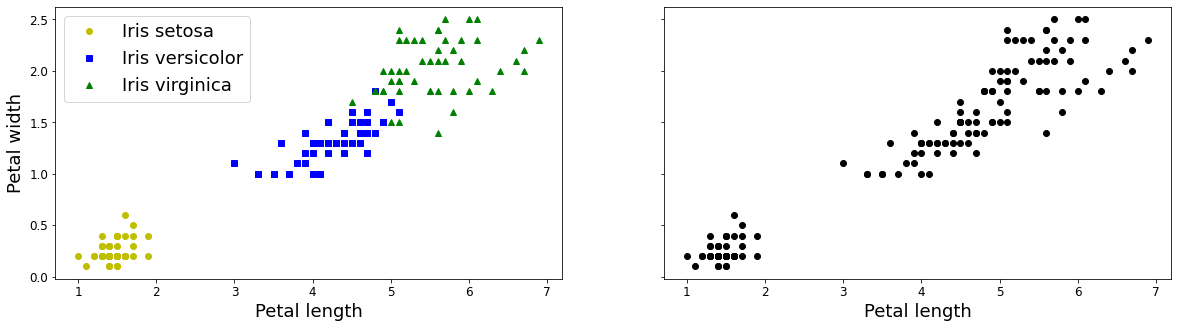

In [25]:
figure: plt.Figure = plt.figure(figsize=(20, 5))
# 1 -> satır sayısı, 2 -> sütun sayısı, 1 -> index
figure.add_subplot(121)

plt.plot(x[y == 0, 2], x[y == 0, 3], "yo", label="Iris setosa")
plt.plot(x[y == 1, 2], x[y == 1, 3], "bs", label="Iris versicolor")
plt.plot(x[y == 2, 2], x[y == 2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=18)
plt.ylabel("Petal width", fontsize=18)
plt.legend(fontsize=18)

# 1 -> satır sayısı, 2 -> sütun sayısı, 2 -> index
plt.subplot(122)
plt.plot(x[:, 2], x[:, 3], "ko")
plt.xlabel("Petal length", fontsize=18)
plt.tick_params(labelleft=False)

## Kendi Kmeans Kodumuzu Yazalim

Kmeans algoritması:

1. Verisetinden rastgele $k$ nokta seç
2. Her bir noktayı kendine en yakın cluster'a ata
3. Cluster merkezlerini, kendine atanan verilerin ortalaması olarak güncelle
4. Maksimum adım sayısına ulaşana kadar veya artık clusterların yeri değişmeyi bırakınca dur

In [63]:
def k_means(dataset: np.ndarray, n_clusters: int, max_steps: int = 25):
    # Başlangıç clusterlarını rastgele belirliyoruz
    data_size = dataset.shape[0]
    randoms = default_rng().integers(0, data_size, n_clusters)
    clusters = dataset[randoms]

    for i in range(max_steps):
        distance_list = []
        # Her bir noktanın diğer clusterlara olan uzaklığını hesaplıyoruz
        for cluster in clusters:
            distances = np.linalg.norm(dataset - cluster, axis=1).reshape((data_size, 1))
            distance_list.append(distances)

        distances = np.concatenate(distance_list, axis=1)

        # Her noktayı kendine en yakın olan cluster'a koyuyoruz
        selected_clusters: np.ndarray = distances.argmin(axis=1)

        # Yeni cluster merkezi, kendine koyulan verilerin ortalaması olacak şekilde güncelliyoruz.
        for cluster_id in range(n_clusters):
            cluster_elements: np.ndarray = dataset[selected_clusters == cluster_id]
            mean = np.mean(cluster_elements, axis=0)
            clusters[cluster_id] = mean

    # Son kez yerleştirme yapıyoruz
    distance_list = []
    for cluster in clusters:
        distances = np.linalg.norm(dataset - cluster, axis=1).reshape((data_size, 1))
        distance_list.append(distances)

    distances = np.concatenate(distance_list, axis=1)
    selected_clusters: np.ndarray = distances.argmin(axis=1)

    return clusters, selected_clusters

In [29]:
from sklearn.cluster import KMeans

In [61]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x, y)
labels = kmeans.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [64]:
cluster_merkezi, cluster_labels = k_means(x, 3)

In [71]:
def plot_iris(x, y, title, index):
    # 1 -> satır sayısı, 3 -> sütun sayısı, 1 -> index
    plt.subplot(1, 3, index)
    plt.plot(x[y == 0, 2], x[y == 0, 3], "yo", label="Iris setosa")
    plt.plot(x[y == 1, 2], x[y == 1, 3], "bs", label="Iris versicolor")
    plt.plot(x[y == 2, 2], x[y == 2, 3], "g^", label="Iris virginica")
    plt.xlabel("Petal length", fontsize=18)
    plt.ylabel("Petal width", fontsize=18)
    plt.legend(fontsize=18)
    plt.title(title)

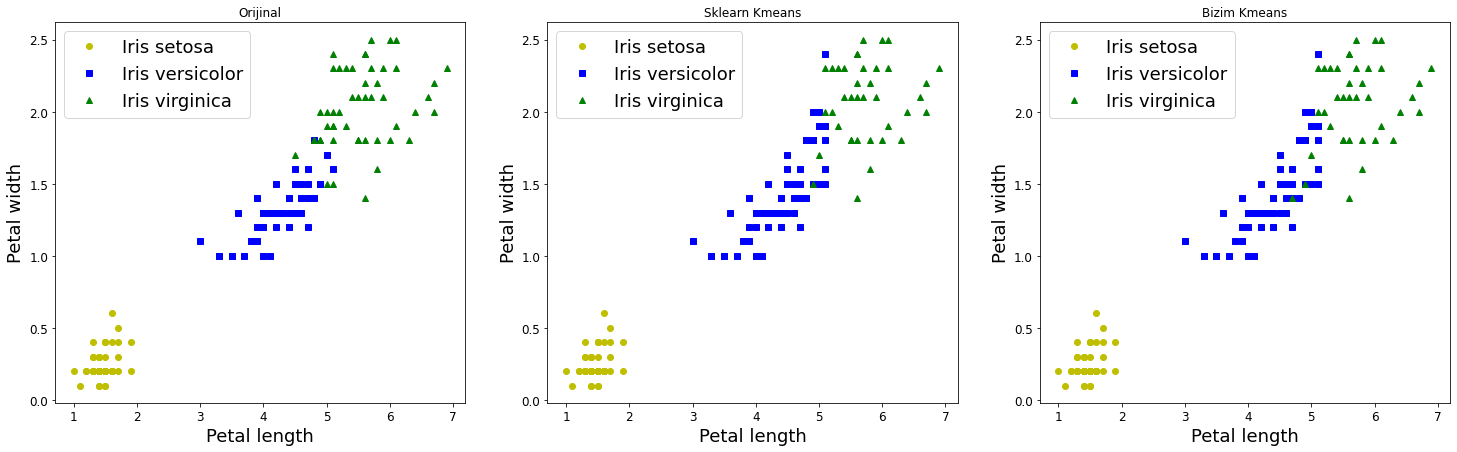

In [74]:
figure: plt.Figure = plt.figure(figsize=(25, 7))

plot_iris(x, y, 'Orijinal', 1)
plot_iris(x, labels, 'Sklearn Kmeans', 2)
plot_iris(x, cluster_labels, 'Bizim Kmeans', 3)
plt.show()

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y, labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



## Damla Verisi

In [3]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[0.2, 2.3],
     [-1.5, 2.3],
     [-2.8, 1.8],
     [-2.8, 2.8],
     [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

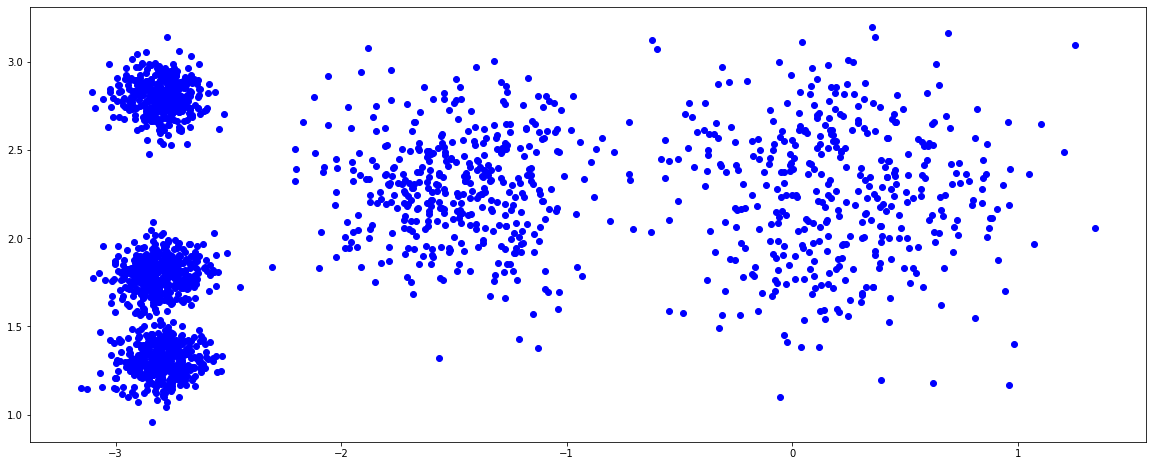

In [11]:
plt.figure(figsize=(20, 8))
plt.plot(X[:, 0], X[:, 1], 'bo')
plt.show()

Cluster sayısını 5 yapmak uygun gözüküyor. Hadi 5,3 ve 8 için deneyelim ve sonuçları görelim.

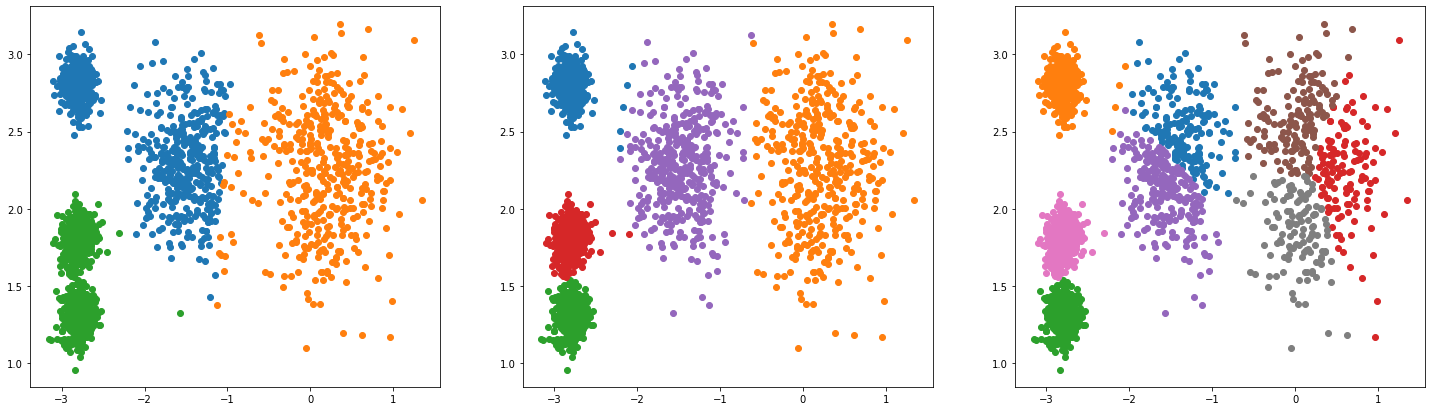

In [85]:
kmeans = KMeans(n_clusters=3)
labels_3 = kmeans.fit_predict(X)

kmeans = KMeans(n_clusters=5)
labels_5 = kmeans.fit_predict(X)


kmeans = KMeans(n_clusters=8)
labels_8 = kmeans.fit_predict(X)

# plot 3
figure, subplots = plt.subplots(1,3, figsize =(25,7))

unique_labels = set(labels_3)
for label in unique_labels:
    subplots[0].scatter(X[labels_3==label,0], X[labels_3==label,1])

unique_labels = set(labels_5)
for label in unique_labels:
    subplots[1].scatter(X[labels_5==label,0], X[labels_5==label,1])

unique_labels = set(labels_8)
for label in unique_labels:
    subplots[2].scatter(X[labels_8==label,0], X[labels_8==label,1])


## K-Means Cluster Sayısını Belirleme - Inertia

Yukarıdaki verilere baktığımız zaman 5 tane cluster ideal gözüküyor. Ancak elimizdeki veri her zaman (belki de hiçbir zaman) böyle güzel şekilde dağılmayacak. Peki en iyi cluster sayısına nasıl karar verebiliriz?


In [18]:
from sklearn.cluster import KMeans

max_cluster_sayisi = 8

all_experiments = []

for n_cluster in range(max_cluster_sayisi):
    kmeans = KMeans(n_clusters=n_cluster + 1)
    kmeans.fit(X)
    all_experiments.append(kmeans)

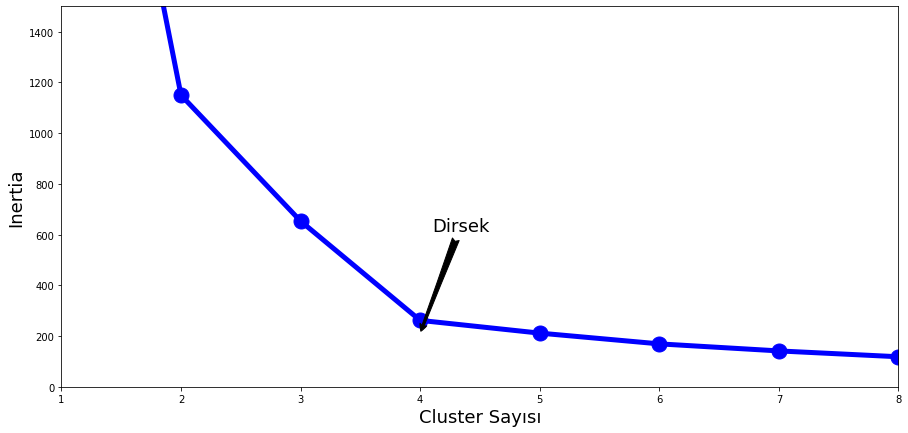

In [56]:
inertias = [experiment.inertia_ for experiment in all_experiments]
plt.figure(figsize=(15, 7))
plt.plot([1, 2, 3, 4, 5, 6, 7, 8], inertias, 'bo-', linewidth=5, markersize=15)
plt.axis([1, 8, 0, 1500])
plt.xlabel('Cluster Sayısı', fontsize=18)
plt.ylabel('Inertia', fontsize=18)
plt.annotate('Dirsek', xy=(4, inertias[4]), xytext=(0.4, 0.4), textcoords='figure fraction', fontsize=18,
             arrowprops=dict(facecolor='black', arrowstyle='fancy'))
plt.show()

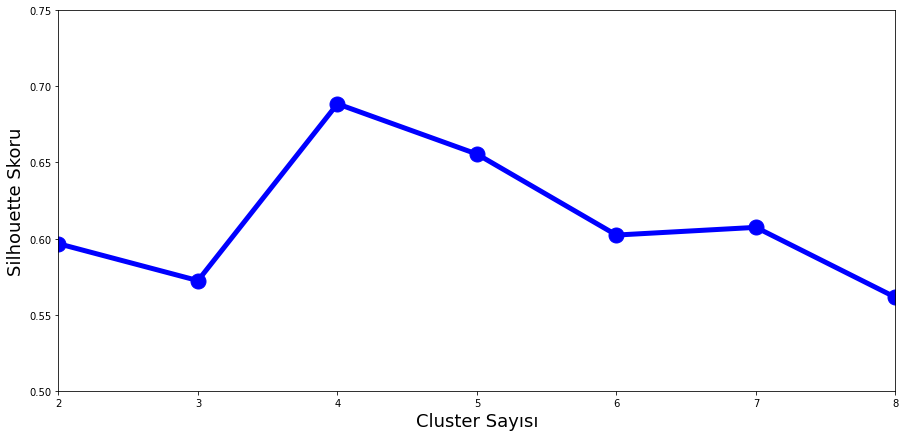

In [67]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, experiment.labels_) for experiment in all_experiments[1:]]
plt.figure(figsize=(15, 7))
plt.plot([2, 3, 4, 5, 6, 7, 8], silhouette_scores, 'bo-', linewidth=5, markersize=15)
plt.axis([2, 8, 0.5, 0.75])
plt.xlabel('Cluster Sayısı', fontsize=18)
plt.ylabel('Silhouette Skoru', fontsize=18)
plt.show()